In [1]:
import pandas as pd
import seaborn as sns
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import sqlite3
import os
import folium
import json
import googlemaps


from konlpy.tag import Mecab
import pandas as pd
#워드 클라우드
from wordcloud import WordCloud
from konlpy.tag import Okt


# %matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'


import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)



In [2]:
con = sqlite3.connect("./kospi1.db")
df = pd.read_sql("SELECT * FROM test", con, index_col=None)
df=df.drop('index',axis=True)

In [3]:
text=' '.join(df['훈련명']) # 제목만 추출

In [4]:
okt=Okt()   #객체 생성 
nouns=okt.nouns(text)
nouns    

['모바일',
 '웹',
 '퍼블리싱',
 '웹표준',
 '웹',
 '퍼블리셔',
 '웹',
 '코딩',
 '빅데이터',
 '분석',
 '기사',
 '필기',
 '금손',
 '비법',
 '보통',
 '직장인',
 '위',
 '데이터',
 '분석',
 '실무',
 '바로',
 '파이썬',
 '웹크롤러',
 '제작',
 '자바',
 '파이썬',
 '활용',
 '통계',
 '기반',
 '빅데이터',
 '개발자',
 '과정',
 '처음',
 '공부',
 '파이썬',
 '시작',
 '데이터',
 '분석',
 '엑셀',
 '파이썬',
 '초',
 '빅데이터',
 '필수',
 '코딩',
 '언어',
 '파이썬',
 '스파크',
 '차',
 '산업',
 '대의',
 '성공',
 '비즈니스',
 '위',
 '사물인터넷',
 '빅데이터',
 '개념',
 '이해',
 '분석',
 '역량',
 '강화',
 '사원',
 '랜섬웨어',
 '악성코드',
 '방법',
 '왕초보',
 '문과',
 '감성',
 '세상',
 '제일',
 '데이터',
 '분석',
 '활용',
 '빅데이터',
 '및',
 '통계',
 '분석',
 '해킹',
 '침투',
 '시대',
 '보안',
 '파이썬',
 '이용',
 '자동화',
 '스크립트',
 '사원',
 '빅데이터',
 '관통',
 '차',
 '산업',
 '미래',
 '핵집',
 '빅데이터',
 '분석',
 '기사',
 '필기',
 '차',
 '산업혁명',
 '경영학',
 '인문학',
 '차',
 '산업혁명',
 '자주',
 '일',
 '제안',
 '스킬',
 '만큼',
 '정보보안',
 '패스',
 '핵심',
 '공략',
 '정보처리기사',
 '필기',
 '종합',
 '반',
 '사원',
 '학습',
 '사물인터넷',
 '차',
 '산업',
 '미래',
 '메타',
 '버스',
 '여',
 '세상',
 '블록',
 '체인',
 '통한',
 '차',
 '산업혁명',
 '시대',
 '비즈니스',
 '모델',
 '사례',
 '의사결정',
 '빅데이터',
 

In [5]:
txt_=' '.join(nouns)
txt_

'모바일 웹 퍼블리싱 웹표준 웹 퍼블리셔 웹 코딩 빅데이터 분석 기사 필기 금손 비법 보통 직장인 위 데이터 분석 실무 바로 파이썬 웹크롤러 제작 자바 파이썬 활용 통계 기반 빅데이터 개발자 과정 처음 공부 파이썬 시작 데이터 분석 엑셀 파이썬 초 빅데이터 필수 코딩 언어 파이썬 스파크 차 산업 대의 성공 비즈니스 위 사물인터넷 빅데이터 개념 이해 분석 역량 강화 사원 랜섬웨어 악성코드 방법 왕초보 문과 감성 세상 제일 데이터 분석 활용 빅데이터 및 통계 분석 해킹 침투 시대 보안 파이썬 이용 자동화 스크립트 사원 빅데이터 관통 차 산업 미래 핵집 빅데이터 분석 기사 필기 차 산업혁명 경영학 인문학 차 산업혁명 자주 일 제안 스킬 만큼 정보보안 패스 핵심 공략 정보처리기사 필기 종합 반 사원 학습 사물인터넷 차 산업 미래 메타 버스 여 세상 블록 체인 통한 차 산업혁명 시대 비즈니스 모델 사례 의사결정 빅데이터 활용 한번 합격 정보처리기사 필기 패스 리눅스 마스터 급 올인원 차 산업혁명 경영학 가상현실 불가능 세상 실무 활용 업무 능률 데이터 분석 차 산업혁명 경영학 인문학 차 산업혁명 랜섬 웨어 예방 및 사이버 보안 첫 걸음 사원 교육 하라 파이썬 핵심 바이블 실습 데이터베이스 보통 직장인 위 데이터 활용 보통 직장인 위 데이터 리터 러시 비 전공자 입문 코딩 강사 양성 과정 핵집 빅데이터 분석 기사 실기 패스 핵심 공략 정보처리기사 필기 종합 반 주 합격 올인원 패스 데이터 분석 자격증 메타 버스 이해 바로 활용 어서 인공 지능 처음 실전 개발자 위 패스 핵심 공략 정보처리기사 필기 종합 반 랜섬 웨어 예방 및 사이버 보안 첫 걸음 사원 교육 하라 미래 예측 빅데이터 활용 눈 인포그래픽 일 위 프로젝트 코딩 처음 이어도 진짜 입문 위 웹 개발 기초 지식 산업 별 실무 사례 사물인터넷 기술 로 데이터 시각 차 산업혁명 시대 비즈니스 모델 디지털 트랜스 포 메이 션 핵심 인공 지능 이해 금융 취업 완벽 가이드 디지털 시대 금융 데이터 분석 기초 해킹 침투 시대

In [6]:
#단어 한자리 추출하기 
word_1=[i for i in txt_ if len(i)==1]
word_1=list(set(txt_))
print(word_1)

['얼', '만', '거', '음', '랜', '지', '종', '감', '홈', '라', '킹', '셜', '양', '번', '상', '캠', '증', '네', '닐', '존', '이', '벨', '젠', '폐', '쿨', '퍼', '팡', '본', '뷰', '젼', '광', '발', '션', '론', '델', '드', '권', '를', '쏙', '눈', '캐', '피', '멋', '설', '칼', '무', '스', '젝', '단', '머', '개', '디', '클', '웨', '성', '격', '항', '늘', '파', '유', '처', '별', '브', '듀', '농', '술', '프', '커', '벽', '멀', '용', '닝', '하', '험', '케', '취', '츠', '트', '펴', '투', '싱', '힘', '저', '재', '운', '원', '습', '도', '량', '아', '렉', '육', '릭', '릿', '계', '콘', '각', '너', '팁', '완', '간', '폼', '관', '셀', '다', '득', '토', '오', '념', '략', '영', '남', '천', '부', '출', '표', '예', '침', '액', '빅', '초', '안', '큐', '봇', '가', ' ', '워', '맛', '법', '춤', '즘', '견', '베', '샤', '집', '웹', '두', '롤', '쿠', '램', '믹', '런', '왕', '린', '게', '평', '캡', '엔', '탈', '사', '쇼', '즈', '크', '켓', '편', '입', '러', '메', '암', '랫', '버', '세', '털', '앤', '로', '진', '레', '합', '립', '직', '챌', '짜', '둡', '대', '좌', '뷔', '결', '축', '과', '색', '퓨', '필', '요', '컨', '손', '변', '금', '든', '플', '열', '내', '칭', '어', '기', '솔', '옵', '카', '검', '넷', '공',

In [7]:
txt_

'모바일 웹 퍼블리싱 웹표준 웹 퍼블리셔 웹 코딩 빅데이터 분석 기사 필기 금손 비법 보통 직장인 위 데이터 분석 실무 바로 파이썬 웹크롤러 제작 자바 파이썬 활용 통계 기반 빅데이터 개발자 과정 처음 공부 파이썬 시작 데이터 분석 엑셀 파이썬 초 빅데이터 필수 코딩 언어 파이썬 스파크 차 산업 대의 성공 비즈니스 위 사물인터넷 빅데이터 개념 이해 분석 역량 강화 사원 랜섬웨어 악성코드 방법 왕초보 문과 감성 세상 제일 데이터 분석 활용 빅데이터 및 통계 분석 해킹 침투 시대 보안 파이썬 이용 자동화 스크립트 사원 빅데이터 관통 차 산업 미래 핵집 빅데이터 분석 기사 필기 차 산업혁명 경영학 인문학 차 산업혁명 자주 일 제안 스킬 만큼 정보보안 패스 핵심 공략 정보처리기사 필기 종합 반 사원 학습 사물인터넷 차 산업 미래 메타 버스 여 세상 블록 체인 통한 차 산업혁명 시대 비즈니스 모델 사례 의사결정 빅데이터 활용 한번 합격 정보처리기사 필기 패스 리눅스 마스터 급 올인원 차 산업혁명 경영학 가상현실 불가능 세상 실무 활용 업무 능률 데이터 분석 차 산업혁명 경영학 인문학 차 산업혁명 랜섬 웨어 예방 및 사이버 보안 첫 걸음 사원 교육 하라 파이썬 핵심 바이블 실습 데이터베이스 보통 직장인 위 데이터 활용 보통 직장인 위 데이터 리터 러시 비 전공자 입문 코딩 강사 양성 과정 핵집 빅데이터 분석 기사 실기 패스 핵심 공략 정보처리기사 필기 종합 반 주 합격 올인원 패스 데이터 분석 자격증 메타 버스 이해 바로 활용 어서 인공 지능 처음 실전 개발자 위 패스 핵심 공략 정보처리기사 필기 종합 반 랜섬 웨어 예방 및 사이버 보안 첫 걸음 사원 교육 하라 미래 예측 빅데이터 활용 눈 인포그래픽 일 위 프로젝트 코딩 처음 이어도 진짜 입문 위 웹 개발 기초 지식 산업 별 실무 사례 사물인터넷 기술 로 데이터 시각 차 산업혁명 시대 비즈니스 모델 디지털 트랜스 포 메이 션 핵심 인공 지능 이해 금융 취업 완벽 가이드 디지털 시대 금융 데이터 분석 기초 해킹 침투 시대

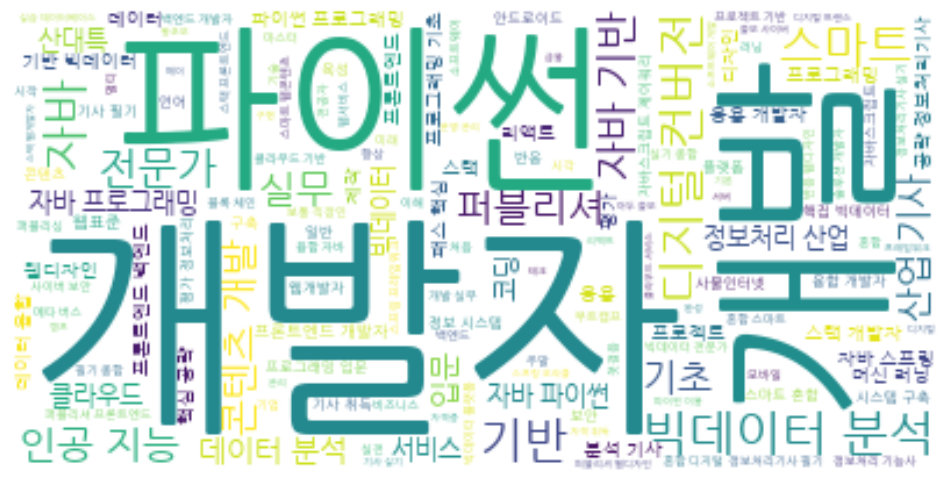

In [9]:
stopwords = ['양성','과정','활용','핫', '즘', '맛', '스', '석', '윤', '다', '라', '차', '설', '레', '둡', '썬', '메', '련', '젠', '제', '점', '니', '벨', '현', '좌', '킹', '활', '급', '폼', '얼', '나', '멋', '텐', '누', '유', '야', '품', '백', '테', '공', '평', '전', '샵', '론', '개', '피', '투', '샤', '판', '뮤', '토', '리', '큰', '객', '타', '신', '쟁', '팩', '존', '널', '회', '브', '티', '간', '산', '쿨', '교', '성', '몰', '싱', '델', '양', '해', '치', '번', '행', '킷', '록', '올', '무', '것', '시', '립', '러', '컴', '셋', '림', '경', '픽', '구', '언', '건', '칭', '두', '뉴', '벌', '익', '속', '폐', '홈', '팅', '멘', '위', '게', '중', '험', '정', '페', '굿', '최', '일', '눅', '함', '키', '율', '감', '럴', '셀', '켓', '카', '집', '하', '음', '권', '걸', '링', '닉', '로', '케', '추', '배', '남', '과', '츠', '펴', '에', '접', '지', '자', '한', '랜', '말', '저', '쿼', '뷔', '봇', '사', '종', '금', '큼', '캠', '젝', '포', '랫', '짜', '핀', '손', '보', '특', '환', '약', '가', '농', '션', '적', '바', '쏙', '취', '닐', '폴', '들', '블', '큐', '획', '준', '증', '혼', '앤', '매', '광', '팡', '량', '챗', '캐', '생', '발', '왕', '플', '입', '도', '컨', '장', '멀', '임', '부', '버', '센', '팁', '계', '질', '액', '침', '애', '콘', '픈', '학', '만', '법', '클', '쫄', '그', '변', '네', '린', '측', '검', '통', '복', '베', '힘', '물', '채', '든', '즈', '소', '루', '폰', '챌', '벽', '드', '합', '동', '탈', '알', '념', '열', '셔', '쇼', '온', '와', '대', '세', '내', '관', '딥', '식', '략', '런', '앱', '뷰', '코', '섬', '셜', '색', '화', '거', '결', '률', '킬', '근', '눈', '크', '쿠', '닝', '예', '프', '글', '터', '빅', '항', '람', '퓨', '칼', '쓸', '창', ' ', '퍼', '용', '패', '엔', '선', '워', '주', '연', '너', '료', '튜', '파', '서', '등', '형', '능', '처', '작', '템', '울', '명', '텍', '혁', '및', '습', '랙', '육', '암', '빌', '상', '를', '의', '털', '웹', '비', '모', '이', '줄', '펌', '운', '릿', '각', '넷', '펠', '업', '듀', '캡', '불', '늘', '퇴', '꿀', '여', '진', '우', '첫', '엘', '고', '득', '완', '믹', '수', '딩', '역', '둑', '데', '미', '븐', '융', '엑', '출', '렌', '핵', '실', '기', '원', '표', '영', '심', '옥', '커', '반', '마', '호', '머', '어', '웨', '견', '축', '밍', '풀', '방', '래', '훈', '초', '직', '응', '춤', '본', '요', '덕', '인', '박', '택', '맞', '아', '트', '렉', '솔', '문', '노', '젼', '먼', '옵', '웰', '별', '오', '필', '악', '안', '핑', '조', '램', '디', '체', '달', '강', '재', '단', '천', '태', '국', '력', '롤', '던', '탄', '격', '술', '분', '례', '편', '향', '릭','대해','취업','이후','질문','사', '형', '발', '원', '꿈', '팀', '편', '의', '계', '험', '언', '얼', '수', '줄', '티', '마', '함', '터', '취', '들', '그', '말', '칙', '민', '체', '순', '물', '갑', '왜', '오', '실', '혹', '찾', '빠', '케', '앞', '키', '러', '관', '먹', '올', '텔', '로', '본', '열', '양', '움', '월', '창', '방', '소', '퇴', '턴', '커', '님', '각', '조', '입', '충', '우', '택', '틱', '건', '품', '위', '모', '좀', '패', '규', '질', '공', '영', '걸', '념', '름', '락', '뭐', '하', '국', '해', '익', '매', '목', '강', '인', '샤', '즘', '경', '대', '폴', '쪽', '링', '막', '면', '범', '테', '력', '준', '지', '크', '안', '천', '현', '설', '례', '류', '독', '연', '업', '군', '만', '망', '헤', '검', '종', '법', '토', '살', '련', '임', '배', '중', '머', '일', '여', '청', '저', '요', '증', '갓', '라', '워', '아', '날', '변', '정', '봉', '널', '가', '희', '무', '륜', '득', '근', '두', '퍼', '야', '못', '후', '래', '피', '등', '네', '재', '한', '도', '뭔', '성', '자', '리', '길', '맛', '때', '헛', '통', '격', '료', '술', '빅', '향', '전', '간', '약', '출', '산', '애', '슨', '프', '유', '볼', '교', '나', ' ', '행', '집', '끝', '노', '암', '어', '결', '디', '밀', '시', '불', '니', '악', '이', '복', '뉴', '괜', '잠', '맥', '장', '평', '상', '팅', '광', '떄', '압', '내', '개', '회', '트', '돈', '선', '학', '초', '차', '분', '첫', '치', '부', '베', '홍', '구', '화', '외', '탈', '앱', '걱', '햇', '농', '기', '금', '데', '및', '엄', '비', '컴', '촌', '을', '심', '직', '급', '세', '버', '포', '백', '음', '신', '식', '거', '알', '죄', '졸', '제', '문', '타', '울', '은', '플', '펙', '용', '남', '친', '것', '웹', '놀', '담', '속', '레', '카', '녀', '진', '호', '손', '생', '감', '미', '추', '접', '활', '게', '능', '주', '점', '덕', '다', '서', '역', '보', '과', '년', '페', '드', '총', '람', '휴', '혼', '병', '최', '고', '반', '록', '동', '스', '바', '퓨', '축', '려']

wc=WordCloud(font_path='./NanumGothic.ttf',
             background_color='white',
             
             max_words=2000,
             stopwords = stopwords,
             max_font_size=100)
wordFre=wc.generate(txt_)


plt.figure(figsize=(12,12))
plt.imshow(wordFre,interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
display(wordFre.words_)

{'개발자': 1.0,
 '개발': 0.6666666666666666,
 '파이썬': 0.5512820512820513,
 '빅데이터 분석': 0.49572649572649574,
 '디지털 컨버전': 0.47435897435897434,
 '자바': 0.452991452991453,
 '기반': 0.42735042735042733,
 '스마트': 0.41025641025641024,
 '전문가': 0.33760683760683763,
 '자바 기반': 0.32051282051282054,
 '퍼블리셔': 0.31196581196581197,
 '인공 지능': 0.3034188034188034,
 '콘텐츠 개발': 0.2948717948717949,
 '실무': 0.2905982905982906,
 '기초': 0.27350427350427353,
 '산업 기사': 0.2692307692307692,
 '데이터 분석': 0.2564102564102564,
 '입문': 0.25213675213675213,
 '자바 프로그래밍': 0.24358974358974358,
 '산대특': 0.23076923076923078,
 '코딩': 0.2222222222222222,
 '정보처리 산업': 0.21367521367521367,
 '클라우드': 0.2094017094017094,
 '자바 파이썬': 0.19230769230769232,
 '빅데이터': 0.18376068376068377,
 '서비스': 0.1794871794871795,
 '파이썬 프로그래밍': 0.16666666666666666,
 '자바 스프링': 0.1581196581196581,
 '웹디자인': 0.15384615384615385,
 '스택': 0.14102564102564102,
 '스택 개발자': 0.13675213675213677,
 '프론트엔드 백엔드': 0.13675213675213677,
 '데이터 융합': 0.13675213675213677,
 '데이터': 0.1324786324786

In [11]:
from konlpy.tag import Okt

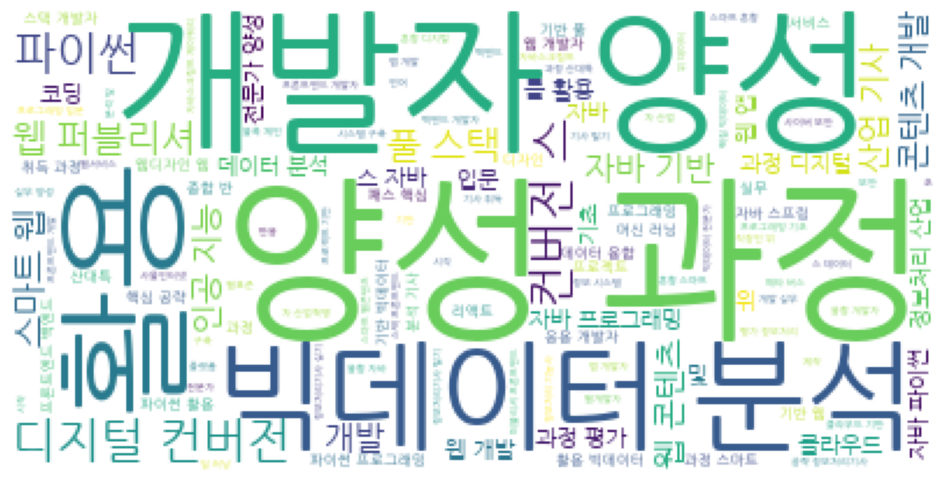

In [12]:
#워드 클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)


wc = WordCloud('./NanumGothic.ttf',
               background_color = "white",
               max_words = 2000)
               #stopwords = stopwords)
wc = wc.generate(txt_) # str자료만 가능, list자료는 안됨
plt.figure(figsize = (12, 12))
plt.imshow(wc) #interpolation = "bilinear")
plt.axis("off")
plt.show()

In [13]:
from collections import Counter

In [14]:
re2=txt_.split(' ') 
top=50
cnt = Counter(re2)
top_=cnt.most_common(top)
top_[:5]

[('과정', 488), ('웹', 391), ('개발자', 375), ('양성', 368), ('자바', 337)]

In [17]:
# 단어집계 데이터프레임으로 바꾸기
import pandas as pd
alldf=pd.DataFrame(top_, columns=['word','freq'])
alldf.head(5)

,word,freq
0,과정,488
1,웹,391
2,개발자,375
3,양성,368
4,자바,337


In [18]:
#특정 단어제거
fillter=((df['word']!='과정')&(df['word']!='양성'))
alldf=df[fillter]
alldf.head(10)

,word,freq
1,웹,391
2,개발자,375
4,자바,337
5,활용,283
6,개발,261
7,빅데이터,250
8,기반,240
9,파이썬,224
10,분석,196
11,프로그래밍,181


In [19]:
con = sqlite3.connect("./kospi1.db")
df1 = pd.read_sql("SELECT * FROM test", con, index_col=None)
df2=df1.drop('index',axis=True)

In [20]:
import seaborn as sns
import pandas as pd



df2= df2.dropna(subset=['취업률'], how='any', axis=0)


['현', '얼', '부', '출', '제', '썬', '객', '고', '링', '일', '분', '음', '랜', '거', '지', '종', '표', '감', '예', '픽', '홈', '블', '라', '경', '구', '마', '비', '침', '킹', '액', '양', '번', '상', '캠', '빅', '록', '초', '쿼', '안', '와', '큐', '리', '증', '봇', '국', '가', '의', ' ', '적', '워', '루', '네', '닐', '밍', '존', '이', '핵', '측', '엑', '젠', '텍', '벨', '랙', '퍼', '향', '복', '팡', '온', '본', '맛', '래', '료', '컴', '람', '법', '텐', '뷰', '서', '젼', '즘', '능', '베', '물', '심', '발', '션', '론', '데', '신', '작', '집', '델', '웹', '드', '쿠', '롤', '시', '램', '포', '를', '폴', '옥', '평', '쏙', '핑', '눈', '말', '엔', '사', '피', '쇼', '응', '즈', '눅', '무', '엘', '걸', '스', '젝', '융', '소', '크', '강', '단', '자', '켓', '및', '머', '미', '개', '디', '클', '노', '수', '웨', '입', '성', '률', '튜', '탄', '련', '격', '러', '닉', '글', '동', '차', '메', '늘', '파', '훈', '애', '랫', '유', '처', '누', '중', '버', '브', '털', '세', '앤', '에', '샵', '로', '픈', '술', '업', '준', '몰', '프', '커', '진', '레', '합', '알', '멀', '용', '립', '조', '직', '타', '위', '환', '명', '닝', '하', '택', '페', '치', '험', '대', '터', '케', '티', '올', '력', '취', '최', '판',

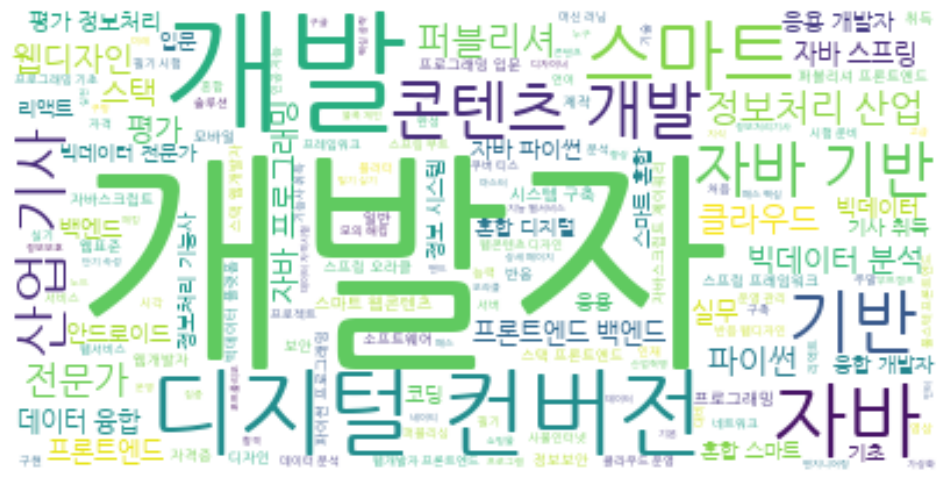

,word,freq
0,웹,267
2,자바,221
3,개발자,192
5,개발,172
6,활용,127
7,기반,123
8,스마트,123
9,디지털,117
10,스,110
11,컨버전,109


In [25]:
text=' '.join(df2['훈련명']) # 제목만 추출

okt=Okt()   #객체 생성 
nouns=okt.nouns(text)
nouns    
txt_=' '.join(nouns)
txt_
#단어 한자리 추출하기 
word_1=[i for i in txt_ if len(i)==1]
word_1=list(set(txt_))
print(word_1)
stopwords = ['양성','과정','활용','핫', '즘', '맛', '스', '석', '윤', '다', '라', '차', '설', '레', '둡', '썬', '메', '련', '젠', '제', '점', '니', '벨', '현', '좌', '킹', '활', '급', '폼', '얼', '나', '멋', '텐', '누', '유', '야', '품', '백', '테', '공', '평', '전', '샵', '론', '개', '피', '투', '샤', '판', '뮤', '토', '리', '큰', '객', '타', '신', '쟁', '팩', '존', '널', '회', '브', '티', '간', '산', '쿨', '교', '성', '몰', '싱', '델', '양', '해', '치', '번', '행', '킷', '록', '올', '무', '것', '시', '립', '러', '컴', '셋', '림', '경', '픽', '구', '언', '건', '칭', '두', '뉴', '벌', '익', '속', '폐', '홈', '팅', '멘', '위', '게', '중', '험', '정', '페', '굿', '최', '일', '눅', '함', '키', '율', '감', '럴', '셀', '켓', '카', '집', '하', '음', '권', '걸', '링', '닉', '로', '케', '추', '배', '남', '과', '츠', '펴', '에', '접', '지', '자', '한', '랜', '말', '저', '쿼', '뷔', '봇', '사', '종', '금', '큼', '캠', '젝', '포', '랫', '짜', '핀', '손', '보', '특', '환', '약', '가', '농', '션', '적', '바', '쏙', '취', '닐', '폴', '들', '블', '큐', '획', '준', '증', '혼', '앤', '매', '광', '팡', '량', '챗', '캐', '생', '발', '왕', '플', '입', '도', '컨', '장', '멀', '임', '부', '버', '센', '팁', '계', '질', '액', '침', '애', '콘', '픈', '학', '만', '법', '클', '쫄', '그', '변', '네', '린', '측', '검', '통', '복', '베', '힘', '물', '채', '든', '즈', '소', '루', '폰', '챌', '벽', '드', '합', '동', '탈', '알', '념', '열', '셔', '쇼', '온', '와', '대', '세', '내', '관', '딥', '식', '략', '런', '앱', '뷰', '코', '섬', '셜', '색', '화', '거', '결', '률', '킬', '근', '눈', '크', '쿠', '닝', '예', '프', '글', '터', '빅', '항', '람', '퓨', '칼', '쓸', '창', ' ', '퍼', '용', '패', '엔', '선', '워', '주', '연', '너', '료', '튜', '파', '서', '등', '형', '능', '처', '작', '템', '울', '명', '텍', '혁', '및', '습', '랙', '육', '암', '빌', '상', '를', '의', '털', '비', '모', '이', '줄', '펌', '운', '릿', '각', '넷', '펠', '업', '듀', '캡', '불', '늘', '퇴', '꿀', '여', '진', '우', '첫', '엘', '고', '득', '완', '믹', '수', '딩', '역', '둑', '데', '미', '븐', '융', '엑', '출', '렌', '핵', '실', '기', '원', '표', '영', '심', '옥', '커', '반', '마', '호', '머', '어', '웨', '견', '축', '밍', '풀', '방', '래', '훈', '초', '직', '응', '춤', '본', '요', '덕', '인', '박', '택', '맞', '아', '트', '렉', '솔', '문', '노', '젼', '먼', '옵', '웰', '별', '오', '필', '악', '안', '핑', '조', '램', '디', '체', '달', '강', '재', '단', '천', '태', '국', '력', '롤', '던', '탄', '격', '술', '분', '례', '편', '향', '릭','대해','취업','이후','질문','사', '형', '발', '원', '꿈', '팀', '편', '의', '계', '험', '언', '얼', '수', '줄', '티', '마', '함', '터', '취', '들', '그', '말', '칙', '민', '체', '순', '물', '갑', '왜', '오', '실', '혹', '찾', '빠', '케', '앞', '키', '러', '관', '먹', '올', '텔', '로', '본', '열', '양', '움', '월', '창', '방', '소', '퇴', '턴', '커', '님', '각', '조', '입', '충', '우', '택', '틱', '건', '품', '위', '모', '좀', '패', '규', '질', '공', '영', '걸', '념', '름', '락', '뭐', '하', '국', '해', '익', '매', '목', '강', '인', '샤', '즘', '경', '대', '폴', '쪽', '링', '막', '면', '범', '테', '력', '준', '지', '크', '안', '천', '현', '설', '례', '류', '독', '연', '업', '군', '만', '망', '헤', '검', '종', '법', '토', '살', '련', '임', '배', '중', '머', '일', '여', '청', '저', '요', '증', '갓', '라', '워', '아', '날', '변', '정', '봉', '널', '가', '희', '무', '륜', '득', '근', '두', '퍼', '야', '못', '후', '래', '피', '등', '네', '재', '한', '도', '뭔', '성', '자', '리', '길', '맛', '때', '헛', '통', '격', '료', '술', '빅', '향', '전', '간', '약', '출', '산', '애', '슨', '프', '유', '볼', '교', '나', ' ', '행', '집', '끝', '노', '암', '어', '결', '디', '밀', '시', '불', '니', '악', '이', '복', '뉴', '괜', '잠', '맥', '장', '평', '상', '팅', '광', '떄', '압', '내', '개', '회', '트', '돈', '선', '학', '초', '차', '분', '첫', '치', '부', '베', '홍', '구', '화', '외', '탈', '앱', '걱', '햇', '농', '기', '금', '데', '및', '엄', '비', '컴', '촌', '을', '심', '직', '급', '세', '버', '포', '백', '음', '신', '식', '거', '알', '죄', '졸', '제', '문', '타', '울', '은', '플', '펙', '용', '남', '친', '것', '웹', '놀', '담', '속', '레', '카', '녀', '진', '호', '손', '생', '감', '미', '추', '접', '활', '게', '능', '주', '점', '덕', '다', '서', '역', '보', '과', '년', '페', '드', '총', '람', '휴', '혼', '병', '최', '고', '반', '록', '동', '스', '바', '퓨', '축', '려']

wc=WordCloud(font_path='./NanumGothic.ttf',
             background_color='white',
             
             max_words=2000,
             stopwords = stopwords,
             max_font_size=100)
wordFre=wc.generate(txt_)


plt.figure(figsize=(12,12))
plt.imshow(wordFre,interpolation='bilinear')
plt.axis('off')
plt.show()

re2=txt_.split(' ') 
top=50
cnt = Counter(re2)
top_=cnt.most_common(top)
top_[:5]
# 단어집계 데이터프레임으로 바꾸기
import pandas as pd
df8=pd.DataFrame(top_, columns=['word','freq'])
df8.head(5)
#코로나,코로나바이러스 단어제거
fillter=((df8['word']!='과정')&(df8['word']!='양성'))
df_null=df8[fillter]
df_null.head(10)

In [26]:
df_null.head(10)

,word,freq
0,웹,267
2,자바,221
3,개발자,192
5,개발,172
6,활용,127
7,기반,123
8,스마트,123
9,디지털,117
10,스,110
11,컨버전,109


In [27]:
con = sqlite3.connect("./kospi1.db")
df = pd.read_sql("SELECT * FROM test", con, index_col=None)
df=df.drop('index',axis=True)

In [28]:
ndf=df[df['취업률'].isnull()]

['얼', '만', '음', '랜', '지', '종', '감', '홈', '라', '킹', '셜', '양', '번', '상', '캠', '증', '네', '존', '이', '벨', '폐', '쿨', '퍼', '본', '뷰', '광', '발', '션', '론', '델', '드', '권', '를', '쏙', '눈', '캐', '피', '멋', '설', '칼', '무', '스', '젝', '단', '머', '개', '디', '클', '웨', '성', '격', '항', '파', '유', '처', '별', '브', '듀', '농', '술', '프', '커', '벽', '멀', '용', '닝', '하', '험', '케', '취', '츠', '트', '투', '싱', '힘', '저', '재', '운', '원', '습', '도', '량', '아', '렉', '육', '릭', '릿', '계', '콘', '각', '너', '팁', '완', '간', '폼', '관', '셀', '다', '득', '토', '오', '념', '략', '영', '남', '천', '부', '출', '표', '예', '침', '액', '빅', '초', '안', '큐', '봇', '가', ' ', '워', '맛', '법', '춤', '즘', '견', '베', '샤', '집', '웹', '두', '롤', '쿠', '램', '믹', '런', '왕', '린', '게', '평', '캡', '엔', '탈', '사', '쇼', '즈', '크', '켓', '편', '입', '러', '메', '암', '랫', '버', '세', '털', '앤', '로', '진', '레', '합', '립', '직', '챌', '짜', '둡', '대', '좌', '결', '축', '과', '색', '퓨', '필', '요', '컨', '손', '변', '금', '든', '플', '열', '내', '칭', '어', '기', '솔', '옵', '카', '검', '넷', '공', '핫', '큰', '등', '널', '뉴', '속', '장', '실',

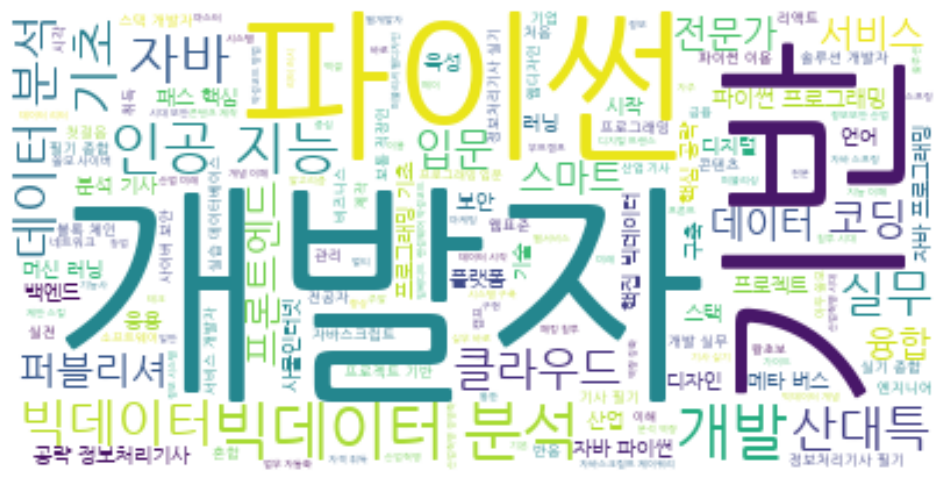

,word,freq
2,개발자,183
3,빅데이터,168
4,파이썬,156
5,활용,156
6,분석,152
7,웹,124
8,기반,117
9,자바,116
10,데이터,103
11,프로그래밍,100


In [29]:
text=' '.join(ndf['훈련명']) # 제목만 추출

okt=Okt()   #객체 생성 
nouns=okt.nouns(text)
nouns    
txt_=' '.join(nouns)
txt_
#단어 한자리 추출하기 
word_1=[i for i in txt_ if len(i)==1]
word_1=list(set(txt_))
print(word_1)
stopwords = ['양성','과정','활용','핫', '즘', '맛', '스', '석', '윤', '다', '라', '차', '설', '레', '둡', '썬', '메', '련', '젠', '제', '점', '니', '벨', '현', '좌', '킹', '활', '급', '폼', '얼', '나', '멋', '텐', '누', '유', '야', '품', '백', '테', '공', '평', '전', '샵', '론', '개', '피', '투', '샤', '판', '뮤', '토', '리', '큰', '객', '타', '신', '쟁', '팩', '존', '널', '회', '브', '티', '간', '산', '쿨', '교', '성', '몰', '싱', '델', '양', '해', '치', '번', '행', '킷', '록', '올', '무', '것', '시', '립', '러', '컴', '셋', '림', '경', '픽', '구', '언', '건', '칭', '두', '뉴', '벌', '익', '속', '폐', '홈', '팅', '멘', '위', '게', '중', '험', '정', '페', '굿', '최', '일', '눅', '함', '키', '율', '감', '럴', '셀', '켓', '카', '집', '하', '음', '권', '걸', '링', '닉', '로', '케', '추', '배', '남', '과', '츠', '펴', '에', '접', '지', '자', '한', '랜', '말', '저', '쿼', '뷔', '봇', '사', '종', '금', '큼', '캠', '젝', '포', '랫', '짜', '핀', '손', '보', '특', '환', '약', '가', '농', '션', '적', '바', '쏙', '취', '닐', '폴', '들', '블', '큐', '획', '준', '증', '혼', '앤', '매', '광', '팡', '량', '챗', '캐', '생', '발', '왕', '플', '입', '도', '컨', '장', '멀', '임', '부', '버', '센', '팁', '계', '질', '액', '침', '애', '콘', '픈', '학', '만', '법', '클', '쫄', '그', '변', '네', '린', '측', '검', '통', '복', '베', '힘', '물', '채', '든', '즈', '소', '루', '폰', '챌', '벽', '드', '합', '동', '탈', '알', '념', '열', '셔', '쇼', '온', '와', '대', '세', '내', '관', '딥', '식', '략', '런', '앱', '뷰', '코', '섬', '셜', '색', '화', '거', '결', '률', '킬', '근', '눈', '크', '쿠', '닝', '예', '프', '글', '터', '빅', '항', '람', '퓨', '칼', '쓸', '창', ' ', '퍼', '용', '패', '엔', '선', '워', '주', '연', '너', '료', '튜', '파', '서', '등', '형', '능', '처', '작', '템', '울', '명', '텍', '혁', '및', '습', '랙', '육', '암', '빌', '상', '를', '의', '털', '비', '모', '이', '줄', '펌', '운', '릿', '각', '넷', '펠', '업', '듀', '캡', '불', '늘', '퇴', '꿀', '여', '진', '우', '첫', '엘', '고', '득', '완', '믹', '수', '딩', '역', '둑', '데', '미', '븐', '융', '엑', '출', '렌', '핵', '실', '기', '원', '표', '영', '심', '옥', '커', '반', '마', '호', '머', '어', '웨', '견', '축', '밍', '풀', '방', '래', '훈', '초', '직', '응', '춤', '본', '요', '덕', '인', '박', '택', '맞', '아', '트', '렉', '솔', '문', '노', '젼', '먼', '옵', '웰', '별', '오', '필', '악', '안', '핑', '조', '램', '디', '체', '달', '강', '재', '단', '천', '태', '국', '력', '롤', '던', '탄', '격', '술', '분', '례', '편', '향', '릭','대해','취업','이후','질문','사', '형', '발', '원', '꿈', '팀', '편', '의', '계', '험', '언', '얼', '수', '줄', '티', '마', '함', '터', '취', '들', '그', '말', '칙', '민', '체', '순', '물', '갑', '왜', '오', '실', '혹', '찾', '빠', '케', '앞', '키', '러', '관', '먹', '올', '텔', '로', '본', '열', '양', '움', '월', '창', '방', '소', '퇴', '턴', '커', '님', '각', '조', '입', '충', '우', '택', '틱', '건', '품', '위', '모', '좀', '패', '규', '질', '공', '영', '걸', '념', '름', '락', '뭐', '하', '국', '해', '익', '매', '목', '강', '인', '샤', '즘', '경', '대', '폴', '쪽', '링', '막', '면', '범', '테', '력', '준', '지', '크', '안', '천', '현', '설', '례', '류', '독', '연', '업', '군', '만', '망', '헤', '검', '종', '법', '토', '살', '련', '임', '배', '중', '머', '일', '여', '청', '저', '요', '증', '갓', '라', '워', '아', '날', '변', '정', '봉', '널', '가', '희', '무', '륜', '득', '근', '두', '퍼', '야', '못', '후', '래', '피', '등', '네', '재', '한', '도', '뭔', '성', '자', '리', '길', '맛', '때', '헛', '통', '격', '료', '술', '빅', '향', '전', '간', '약', '출', '산', '애', '슨', '프', '유', '볼', '교', '나', ' ', '행', '집', '끝', '노', '암', '어', '결', '디', '밀', '시', '불', '니', '악', '이', '복', '뉴', '괜', '잠', '맥', '장', '평', '상', '팅', '광', '떄', '압', '내', '개', '회', '트', '돈', '선', '학', '초', '차', '분', '첫', '치', '부', '베', '홍', '구', '화', '외', '탈', '앱', '걱', '햇', '농', '기', '금', '데', '및', '엄', '비', '컴', '촌', '을', '심', '직', '급', '세', '버', '포', '백', '음', '신', '식', '거', '알', '죄', '졸', '제', '문', '타', '울', '은', '플', '펙', '용', '남', '친', '것', '웹', '놀', '담', '속', '레', '카', '녀', '진', '호', '손', '생', '감', '미', '추', '접', '활', '게', '능', '주', '점', '덕', '다', '서', '역', '보', '과', '년', '페', '드', '총', '람', '휴', '혼', '병', '최', '고', '반', '록', '동', '스', '바', '퓨', '축', '려']

wc=WordCloud(font_path='./NanumGothic.ttf',
             background_color='white',
             
             max_words=2000,
             stopwords = stopwords,
             max_font_size=100)
wordFre=wc.generate(txt_)


plt.figure(figsize=(12,12))
plt.imshow(wordFre,interpolation='bilinear')
plt.axis('off')
plt.show()

re2=txt_.split(' ') 
top=50
cnt = Counter(re2)
top_=cnt.most_common(top)
top_[:5]
# 단어집계 데이터프레임으로 바꾸기
import pandas as pd
df8=pd.DataFrame(top_, columns=['word','freq'])
df8.head(5)
#코로나,코로나바이러스 단어제거
fillter=((df8['word']!='과정')&(df8['word']!='양성'))
df_new=df8[fillter]
df_new.head(10)

In [36]:
alldf.head(10)  #전체 데이터 

,word,freq
1,웹,391
2,개발자,375
4,자바,337
5,활용,283
6,개발,261
7,빅데이터,250
8,기반,240
9,파이썬,224
10,분석,196
11,프로그래밍,181


In [31]:
df_new.head(10)   #2018년이후 유행하는과목들

,word,freq
2,개발자,183
3,빅데이터,168
4,파이썬,156
5,활용,156
6,분석,152
7,웹,124
8,기반,117
9,자바,116
10,데이터,103
11,프로그래밍,100


In [34]:
df_null.head(10)  #2018년 이전에 있었던 과목들

,word,freq
0,웹,267
2,자바,221
3,개발자,192
5,개발,172
6,활용,127
7,기반,123
8,스마트,123
9,디지털,117
10,스,110
11,컨버전,109


<Axes: >

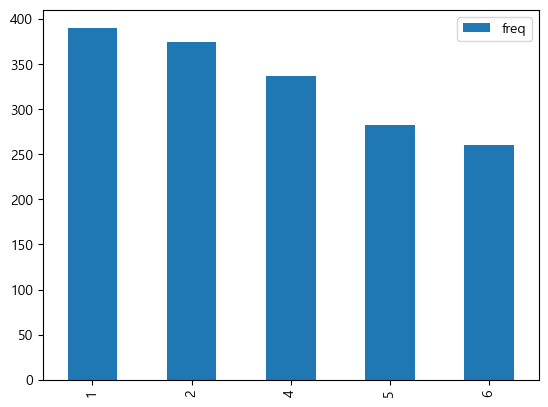

In [49]:

alldf.head().plot(kind='bar')

In [46]:
alldf['word'].values

array(['웹', '개발자', '자바', '활용', '개발', '빅데이터', '기반', '파이썬', '분석', '프로그래밍',
       '스마트', '디지털', '데이터', '프론트엔드', '스', '컨버전', '위', '퍼블리셔', '산업', '기초',
       '실무', '전문가', '클라우드', '및', '기사', '풀', '스택', '콘텐츠', '입문', '지능',
       '스프링', '융합', '앱', '혼합', '인공', '웹디자인', '정보처리', '백엔드', '응용', '평가',
       '코딩', '를', '보안', '취득', '산대특', '서비스', '필기', '프로젝트'], dtype=object)

Text(0.5, 1.0, '전체 과목 워드크라우드')

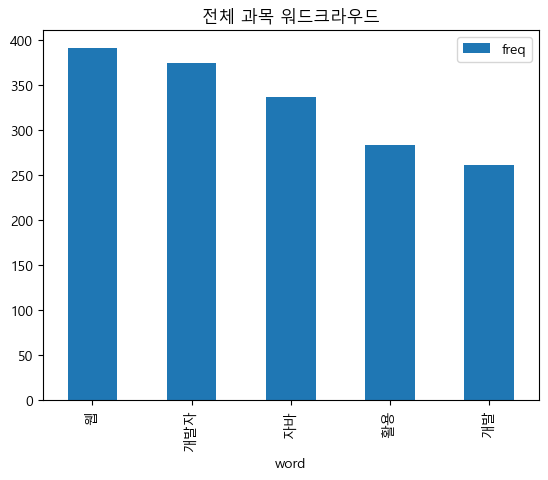

In [56]:
alldf.set_index('word').head().plot(kind='bar')
plt.title('전체 과목 워드크라우드')

Text(0.5, 1.0, '2018년이후의 과목 워드크라우드')

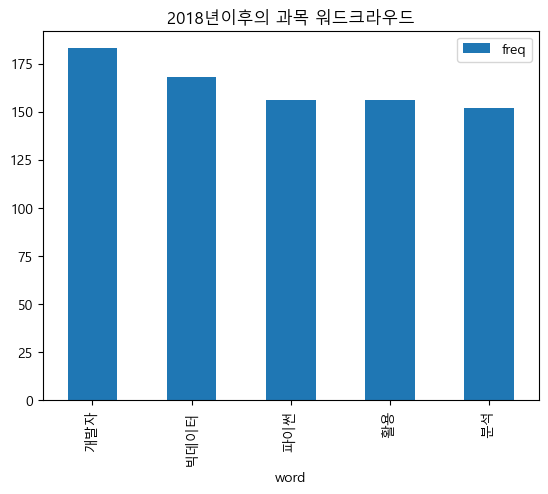

In [58]:
df_new.set_index('word').head().plot(kind='bar')
plt.title('2018년이후의 과목 워드크라우드')